# 1 Predicting movie ratings

Rotten Tomatoes has classified these reviews as "positive" and "negative", respectively, as indicated by the intact tomato on the left and the splattered tomato on the right. In this assignment, you will create a simple text classification system that can perform this task automatically.

We'll warm up with the following set of four mini-reviews, each labeled positive ($+1$) or negative ($-1$):

   ($-1$) pretty bad \
   ($+1$) good plot \
   ($-1$) not good \
   ($+1$) pretty scenery
    
Each review $x$ is mapped onto a feature vector $\phi(x)$, which maps each word to the number of occurrences of that word in the review. For example, the first review maps to the (sparse) feature vector $\phi(x) = \{\text{pretty}:1, \text{bad}:1\}$. 

Recall the definition of the hinge loss: $$\text{Loss}_{\text{hinge}}(x, y, \mathbf{w}) = \max \{0, 1 - \mathbf{w} \cdot \phi(x) y\},$$ where $y$ is the correct label.

1. Suppose we run stochastic gradient descent, updating the weights according to $$\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w}),$$ once for each of the four examples in the order given above. After the classifier is trained on the given four data points, what are the weights of the six words ("pretty", "good", "bad", "plot", "not", "scenery") that appear in the above reviews? Use $\eta = .5$ as the step size and initialize $\mathbf{w} = [0, ..., 0]$. Assume that $\nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w}) = 0$ when the margin is exactly 1.

*Solution*

Expanding the feature vector example:

$$\phi(\text{pretty bad}) = \left[\begin{array}{c} 1\\ 1 \\ 0 \\ 0 \\0 \\0\end{array}\right]
                            \left.\begin{array}{l} \leftarrow\text{pretty}\\ \leftarrow\text{bad} \\ \leftarrow\text{good} \\ \leftarrow\text{plot} \\\leftarrow\text{not} \\\leftarrow\text{scenery}\end{array}\right.$$

And the gradient of the function, as seen on second lecture is

$$\nabla_{\mathbf w}\text{Loss}_{\text{hinge}}(x, y, \mathbf{w}) = \left\{\begin{array}{ccc}
                                              0 & \text{if} &\mathbf w\cdot\phi(x)\geq 1 \\
                                              -\phi(x)y & \text{if} &\mathbf w\cdot\phi(x)< 1
                                              \end{array}\right.$$
                                              
On the first iteration, the new $\mathbf w$ will be:

$$\mathbf w \leftarrow \left[\begin{array}{c} 0\\ 0 \\ 0 \\ 0 \\0 \\0\end{array}\right] - 0.5
                       \left[-\phi(x)y\right]$$
                       
Running with $x=$ pretty bad $y=-1$:

$$\mathbf w \leftarrow \left[\begin{array}{c} 0\\ 0 \\ 0 \\ 0 \\0 \\0\end{array}\right] - 0.5
                       \left[\begin{array}{c} 1\\ 1 \\ 0\\ 0 \\0 \\0\end{array}\right];
                       \hspace{1cm} \mathbf w = \left[\begin{array}{c} -0.5\\ -0.5\\ 0\\ 0 \\0 \\0\end{array}\right]$$
                       
$x=$ good plot $y=+1$:

$$\mathbf w \leftarrow \left[\begin{array}{c} -0.5\\-0.5 \\ 0 \\ 0 \\0 \\0\end{array}\right] - 0.5
                       \left[\begin{array}{c} 0\\ 0 \\ -1\\-1 \\0 \\0\end{array}\right];
                       \hspace{1cm} \mathbf w = \left[\begin{array}{c} -0.5\\ -0.5\\ 0.5\\ 0.5 \\0 \\0\end{array}\right]$$
                       
$x=$ not good $y=-1$:

$$\mathbf w \leftarrow \left[\begin{array}{c} -0.5\\-0.5 \\0.5 \\0.5 \\0 \\0\end{array}\right] - 0.5
                       \left[\begin{array}{c} 0\\ 0 \\ 1\\0 \\1 \\0\end{array}\right];
                       \hspace{1cm} \mathbf w = \left[\begin{array}{c} -0.5\\ -0.5\\ 0\\ 0.5 \\-0.5 \\0\end{array}\right]$$
                       
$x=$ pretty scenery $y=+1$:

$$\mathbf w \leftarrow \left[\begin{array}{c} -0.5\\ -0.5\\ 0\\ 0.5 \\-0.5 \\0\end{array}\right] - 0.5
                       \left[\begin{array}{c} -1\\ 0 \\ 0\\0 \\0 \\-1\end{array}\right];
                       \hspace{1cm} \mathbf w = \left[\begin{array}{c} 0\\ -0.5\\ 0\\ 0.5 \\-0.5\\0.5\end{array}\right]$$

After iterating over the small dataset, the weights of the words are: "pretty": 0, "bad": -0.5, "good": 0, "plot": 0.5, "not": -0.5, "scenery": 0.5

The following code automates this:

In [40]:
from collections import defaultdict
from util import dotProduct, increment

def scMult(s, v):
    return defaultdict(float,{key:s*v[key] for key in v})

def phi(x):
    return defaultdict(float,{w:x.count(w) for w in x.split()})

def gHL(x,y,w):
    return scMult(-1*y,phi(x)) if dotProduct(w,scMult(y,phi(x)))<1 else 0

examples = [
    {'x':'pretty bad', 'y': -1},
    {'x':'good plot', 'y': 1},
    {'x':'not good', 'y': -1},
    {'x':'pretty scenery', 'y': 1}
]

w = defaultdict(float) #initialize weight vector
eta = 0.5              #initialize step size
for data in examples:
    gLoss = gHL(data['x'],data['y'],w) #calculate gradient of loss of every example
    increment(w, -1*eta, gLoss)        #recalculates weight vector
    print('w:', w)
    
dotProduct(w,phi('its a pretty bad plot'))

w: defaultdict(<class 'float'>, {'pretty': -0.5, 'bad': -0.5})
w: defaultdict(<class 'float'>, {'pretty': -0.5, 'bad': -0.5, 'good': 0.5, 'plot': 0.5})
w: defaultdict(<class 'float'>, {'pretty': -0.5, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5})
w: defaultdict(<class 'float'>, {'pretty': 0.0, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5, 'scenery': 0.5})


0.0

-------------------------------------

2. Create a small labeled dataset of four mini-reviews using the words "not", "good", and "bad", where the labels make intuitive sense. Each review should contain one or two words, and no repeated words. Prove that no linear classifier using word features can get zero error on your dataset.

Remember that this is a question about classifiers, not optimization algorithms; your proof should be true for any linear classifier, regardless of how the weights are learned.
After providing such a dataset, propose a single additional feature that we could augment the feature vector with that would fix this problem. (Hint: think about the linear effect that each feature has on the classification score.)

*Solution*

In the dataset I describe below ("new_examples") we see that, given the restrictions, we have three words and four combinations of those words; this means that at least a word will appear in different examples, so the weights of these features will overlap. We can generalize this idea to every feature vector that implies word features (only in this dataset). If we include non word-related features, such as the length of the given string, would fix this problem (?)

In [37]:
new_examples = [
    {'x':'bad', 'y': -1},
    {'x':'good', 'y': 1},
    {'x':'not good', 'y': -1},
    {'x':'bad good', 'y': 1}
]
w = defaultdict(float) #initialize weight vector
eta = 0.5              #initialize step size
for data in new_examples:
    gLoss = gHL(data['x'],data['y'],w) #calculate gradient of loss of every example
    increment(w, -1*eta, gLoss)        #recalculates weight vector
    print('w:', w)
    print('gLoss:', gLoss)

w: defaultdict(<class 'float'>, {'bad': -0.5})
gLoss: defaultdict(<class 'float'>, {'bad': 1})
w: defaultdict(<class 'float'>, {'bad': -0.5, 'good': 0.5})
gLoss: defaultdict(<class 'float'>, {'good': -1})
w: defaultdict(<class 'float'>, {'bad': -0.5, 'good': 0.0, 'not': -0.5})
gLoss: defaultdict(<class 'float'>, {'not': 1, 'good': 1})
w: defaultdict(<class 'float'>, {'bad': 0.0, 'good': 0.5, 'not': -0.5})
gLoss: defaultdict(<class 'float'>, {'bad': -1, 'good': -1})


------------------------------------------------

# 2 Building Intuition

Suppose that we are now interested in predicting a numeric rating for movie reviews. We will use a non-linear predictor that takes a movie review $x$ and returns $\sigma(\mathbf w \cdot \phi(x))$, where $\sigma(z) = (1 + e^{-z})^{-1}$ is the logistic function that squashes a real number to the range $(0, 1)$. Suppose that we wish to use the squared loss. For this problem, assume that the movie rating $y$ is a real-valued variable in the range $[0, 1]$.
Note: Do not use Wolfram Alpha or other math software to solve this problem.

1. Write out the expression for $\text{Loss}(x, y, \mathbf w)$ for a single datapoint $(x,y)$.

*Solution*

The squared loss function will be the squared difference of the predicted value and the actual value (the residual). That is:

$$\text{Loss}_\text{squared}(x,y,\mathbf w) = (\sigma(\mathbf w\cdot\phi(x))-y)^2$$

-------------------------

2. Compute the gradient of the loss with respect to $\mathbf w$. Hint: you can write the answer in terms of the predicted value $p = \sigma(\mathbf w \cdot \phi(x))$

*Solution*

Using the chain rule and lecture 3 slides:

$$
\begin{align}
\nabla_{\mathbf w}\text{Loss}_\text{squared}(x,y,\mathbf w) &= 2(\sigma(\mathbf w\cdot\phi(x))-y)\sigma(\mathbf w\cdot\phi(x))(1-\sigma(\mathbf w\cdot\phi(x)))\cdot\phi(x) \\
&= 2(p-y) p(1-p)\cdot\phi(x)
\end{align}$$

-------------------------------------

3. Suppose there is one datapoint (x, y) with some arbitrary $\phi(x)$ and y = 1. Can you specify conditions for $\mathbf w$ to make the magnitude of the gradient of the loss with respect to $\mathbf w$ arbitrarily small (minimize the magnitude of the gradient)? If so, how small? Can the magnitude of the gradient with respect to $\mathbf w$ ever be exactly zero? You are allowed to make the magnitude of $\mathbf w$ arbitrarily large but not infinity. Hint: try to understand intuitively what is going on and what each part of the expression contributes. If you find yourself doing too much algebra, you're probably doing something suboptimal.

Motivation: the reason why we're interested in the magnitude of the gradients is because it governs how far gradient descent will step. For example, if the gradient is close to zero when $\mathbf w$ is very far from the optimum, then it could take a long time for gradient descent to reach the optimum (if at all). This is known as the vanishing gradient problem when training neural networks.

*Solution*

The following graph corresponds to $\sigma(z)$:

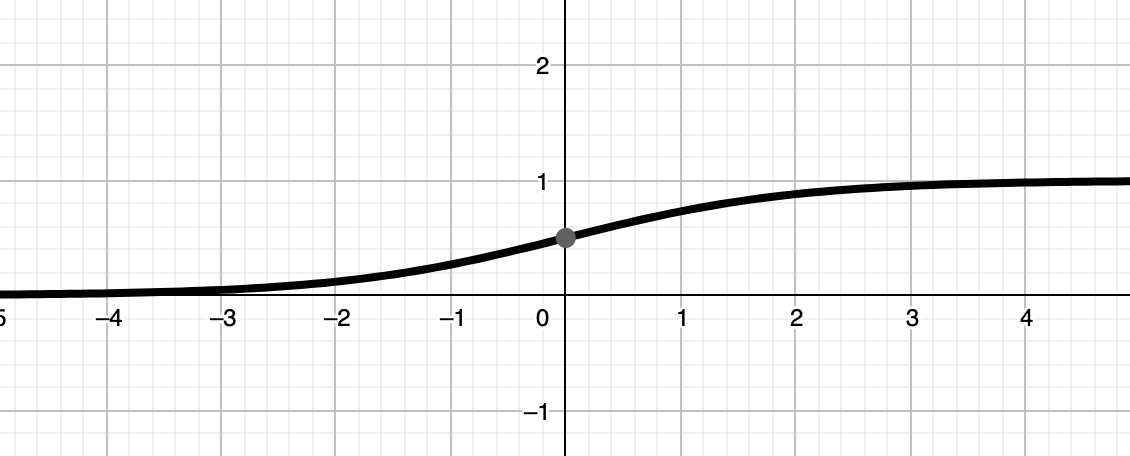

I'll focus on the 1-d case in order to generalize it. Refactoring the expression above, with $p = \sigma(\mathbf w \cdot \phi(x))$ and $y=1$:

$$
\begin{align}
\nabla_{\mathbf w}\text{Loss}_\text{squared}(x,1,\mathbf w) &= 2(p-1) p(1-p)\cdot\phi(x) \\
&= -2p(1-p)^2\cdot\phi(x)
\end{align}
$$

We know that $\sigma(z) \in (0,1)$. Then, if we make $p\rightarrow 1$, the product $-2p(1-p)^2$ will go to zero.  The same argument holds if we make $p\rightarrow 0$.

In order to make $p\rightarrow 1$, the dot product of $\mathbf w$ and $\phi(x)$ must go to $\infty$; since the $\phi(x)$ vector is arbitrary, every entry of the weight vector must be arbitrarily large (positive). Analogously, in order to make $p\rightarrow 0$, every entry of the weight vector must be arbitrarily large (negative).

In other words: we can make the magnitude of the gradient vector arbitrarily close to zero by making the magnitude of the weight vector arbitrarily large; since this vector's magnitude is not infinity, the magnitude of the gradient vector will never be zero.

-------------------------------------------------------------------

4. Assuming the same datapoint (x, y) as above, what is the largest magnitude that the gradient can take? Leave your answer in terms of $\|\phi(x)\|$. Prove that your chosen value is indeed the largest magnitude that the gradient can take.

*Solution*

We'll focus on the value of the function $f(p) = -2p(1-p)^2$, $p\in (0,1)$. Applying some calculus, we see that this function reaches its maxima at $p=0$ and $p=1$ (supposing it can take values 0 and 1), giving a value of $f(0)=f(1)=0$; the same function reaches its minima at $p=\frac{1}{3}$, giving a value of $f\left(\frac{1}{3}\right) = -\frac{8}{27}$. Since we are taking the magnitude, the largest value that the gradient can take will be $\frac{8}{27}\left\|\phi(x)\right\|$

-------------------------------------

5. The problem with the loss function we have defined so far is that is it is non-convex, which means that gradient descent is not guaranteed to find the global minimum. In general these types of problems can be difficult to solve, so let us try to reformulate the problem as plain old linear regression. Suppose you have a dataset $\mathbf D$ consisting of $(x,y)$ pairs, and that there exists a weight vector $\mathbf w$ that yields zero loss on this dataset. The dataset $\mathbf D$ uses the non-linear predictor (i.e., $\sigma(\mathbf w \cdot \phi(x))$) as described above. Show that there is an easy transformation to a modified dataset $\mathbf D'$ of $(x,y')$ pairs such that performing least squares regression (using a linear predictor and the squared loss) on $\mathbf D'$ converges to a vector $\mathbf w^*$ that yields zero loss on $\mathbf D'$. Concretely, write an expression for $y'$ in terms of $y$ and justify this choice. This expression should not be a function of $\mathbf w$.

Hint: write down the loss functions for both datasets and set them equal to 0

*Solution*

Recall from a problem above that que squared loss with the non-linear predictor is given by:

$$\text{Loss}_{\text{squared}}(x,y,\mathbf w) = \left(\sigma(\mathbf w\cdot\phi(x))-y\right)^2$$

In order to make the loss zero, the label value $y$ must equals the non-linearity:

$$y =\sigma(\mathbf w\cdot\phi(x)) = \frac{1}{1+e^{-\mathbf w\cdot\phi(x)}}$$

Getting the score value:

$$\mathbf w\cdot\phi(x) = -\ln\left(\frac{1}{y}-1\right)$$

If we used this score value as the linear predictor for a new dataset $\mathbf D'$, we would obtain a zero squared loss. To do so, the new dataset must consist of $(x,y^{\prime})$ pairs, where:

$$y^{\prime} = -\ln\left(\frac{1}{y}-1\right)$$

In order to get the zero squared loss.

------------------------------------------

# 3 Sentiment classification

In this problem, we will build a binary linear classifier that reads movie reviews and guesses whether they are "positive" or "negative." In this problem, you must implement the functions without using libraries like Scikit-learn.

1. Implement the function extractWordFeatures, which takes a review (string) as input and returns a feature vector $\phi(x)$ (you should represent the vector $\phi(x)$ as a dict in Python).

*Solution*

I've done this in problem 1, so I'll only copy the function and rename it:

In [52]:
def extractWordFeatures(x):
    """
    Extract word features for a string x. Words are delimited by
    whitespace characters only.
    @param string x: 
    @return dict: feature vector representation of x.
    Example: "I am what I am" --> {'I': 2, 'am': 2, 'what': 1}
    """
    # BEGIN_YOUR_CODE (our solution is 4 lines of code, but don't worry if you deviate from this)
    return defaultdict(float,{w:x.count(w) for w in x.split()})
    # END_YOUR_CODE

------------------------------------------

2. Implement the function learnPredictor using stochastic gradient descent and minimize the hinge loss. Print the training error and test error after each iteration to make sure your code is working. You must get less than 4% error rate on the training set and less than 30% error rate on the dev set to get full credit.

*Solution*

I've also done this in problem 1, so I'll only copy the function and rename it:

In [99]:
from collections import defaultdict
from util import dotProduct, increment, readExamples, evaluatePredictor
import math

def scMult(s, v):
    '''
    Multiply scalar and vector
    '''
    return defaultdict(float,{key:s*v[key] for key in v})

def learnPredictor(trainExamples, testExamples, featureExtractor, numIters, eta):
    '''
    Given |trainExamples| and |testExamples| (each one is a list of (x,y)
    pairs), a |featureExtractor| to apply to x, and the number of iterations to
    train |numIters|, the step size |eta|, return the weight vector (sparse
    feature vector) learned.

    You should implement stochastic gradient descent.

    Note: only use the trainExamples for training!
    You should call evaluatePredictor() on both trainExamples and testExamples
    to see how you're doing as you learn after each iteration.
    '''
    weights = defaultdict(float)  # feature => weight
    # BEGIN_YOUR_CODE (our solution is 12 lines of code, but don't worry if you deviate from this)
    def sign(x):
        return 1 if dotProduct(weights,featureExtractor(x)) >= 0 else -1
    for t in range(numIters):
        for d in trainExamples:
            gLoss = scMult(-1*d[1],featureExtractor(d[0])) if dotProduct(weights,scMult(d[1],featureExtractor(d[0])))<1 else defaultdict(float)
            increment(weights, -1*eta, gLoss)        #recalculates weight vector
        print(f'it: {t} | train: {evaluatePredictor(trainExamples,sign)} | test: {evaluatePredictor(testExamples,sign)}')
    # END_YOUR_CODE
    return weights

In [155]:
train = readExamples('polarity.train')
test = readExamples('polarity.dev')
w = learnPredictor(train,test,extractWordFeatures,50,.01)

Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
it: 0 | train: 0.31429375351716377 | test: 0.3764772087788407
it: 1 | train: 0.2535171637591446 | test: 0.3429938097917839
it: 2 | train: 0.21750140686550365 | test: 0.32639279684862127
it: 3 | train: 0.17163759144625773 | test: 0.30838491840180077
it: 4 | train: 0.1634777715250422 | test: 0.30388294879009564
it: 5 | train: 0.16235227912211592 | test: 0.30894766460326395
it: 6 | train: 0.12267867191896455 | test: 0.2864378165447383
it: 7 | train: 0.11170512099043331 | test: 0.2847495779403489
it: 8 | train: 0.11648846370287 | test: 0.2940348902644907
it: 9 | train: 0.09848058525604952 | test: 0.2839054586381542
it: 10 | train: 0.09791783905458638 | test: 0.29375351716375914
it: 11 | train: 0.0827236916150816 | test: 0.2847495779403489
it: 12 | train: 0.09144625773776027 | test: 0.3019133370849747
it: 13 | train: 0.07090602138435566 | test: 0.2819358469330332
it: 14 | train: 0.05880697805289814 | test: 0.2732132

-----------------------------------------

3. Create an artificial dataset for your learnPredictor function by writing the generateExample function (nested in the generateDataset function). Use this to double check that your learnPredictor works!

*Solution*

I didnt understand this part :(

The generateDataset function is meant to return a list of (dict, label) tuples and the instruction says that we must use this function to evaluate whether learnPredictor function works or not; but the trainExamples parameter of the learnPredictor must be a list of (text, label) tuples! Besides, I think this way of double checking is useless because we'll be using what we've already calculated (the weight vector). (?)

In order to give some evidence about my work, I'll just leave here the main ideas to complete the generateDataset function:

In [128]:
dict(random.sample(w.items(), random.choice(range(1,100))))

{'prostituted': -0.20000000000000004,
 'arrest': 0.10999999999999999,
 'self-flagellation': -0.20000000000000004,
 'concocts': 0.04,
 'aggressive': 0.03,
 "'korean": 0.05,
 "oprah's": -0.20000000000000004,
 'strengths': 0.03,
 'unsubtle': 0.11999999999999998,
 'awfully': -0.03,
 'beauty': 0.3200000000000001,
 "diplomat's": 0.01,
 'indulge': 0.09,
 'pastiche': 0.15,
 'brothers': -0.06999999999999998,
 'clocks': -0.01,
 'old': -0.4000000000000002,
 'teeth-gnashing': -0.12999999999999998,
 'promotes': 0.05,
 'advertisement': -0.02,
 "'53": -0.17,
 'tv-insider': -0.20000000000000004,
 "child's": 0.20000000000000004,
 'showing': -0.09,
 'fire-red': -0.13999999999999999,
 'light': -0.24000000000000005,
 'statesmen': 0.16,
 'shinya': 0.09,
 'cellular': -0.17,
 'papin': 0.08,
 'chooses': -0.12999999999999998,
 'pulsating': 0.05,
 'vs': -0.060000000000000005,
 'balm': -0.19000000000000003,
 'embodies': 0.17,
 'woo': -0.5400000000000003,
 'respond': -0.04,
 '451': -0.20000000000000004,
 'thinly'

In [ ]:
def generateDataset(numExamples, weights):
    '''
    Return a set of examples (phi(x), y) randomly which are classified correctly by
    |weights|.
    '''
    random.seed(42)
    # Return a single example (phi(x), y).
    # phi(x) should be a dict whose keys are a subset of the keys in weights
    # and values can be anything (randomize!) with a nonzero score under the given weight vector.
    # y should be 1 or -1 as classified by the weight vector.
    def generateExample():
        # BEGIN_YOUR_CODE (our solution is 2 lines of code, but don't worry if you deviate from this)
        # END_YOUR_CODE
        return (phi, y)
    return [generateExample() for _ in range(numExamples)]

-----------------------------------

4. When you run the grader.py on test case 3b-2, it should output a weights file and a error-analysis file. Look through some example incorrect predictions and for five of them, give a one-sentence explanation of why the classification was incorrect. What information would the classifier need to get these correct? In some sense, there's not one correct answer, so don't overthink this problem. The main point is to convey intuition about the problem.

*Solution*

I adapted a sign predictor and fed it with random movie reviews I came up with. Here are some results:

In [232]:
def sign(x,w,phi):
    return 1 if dotProduct(w,phi(x)) >= 0 else -1

examples = [
    'if awful was cool, this movie is pretty cool',
    'this movie was pretty cool',
    'bad-ass movie',
    'well done, assholes',
    'great way of wasting money',
    'that was the worst movie i have ever seen',
    'that was awful',
    'that was the best movie i have ever seen',
]

for text in examples:
    print(text, sign(text,w,extractWordFeatures))

if awful was cool, this movie is pretty cool -1
this movie was pretty cool -1
bad-ass movie -1
well done, assholes 1
great way of wasting money 1
that was the worst movie i have ever seen -1
that was awful -1
that was the best movie i have ever seen -1


We can see that almost all of them contain some sarcasm and are labeled with an incorrect prediction. I think that we could improve this model by fine-tuning the feature extractor to catch the order of the words, not only their prescence. Also a fuzzy matching of words could help.

--------------------------------------------

5. Now we will try a crazier feature extractor. Some languages are written without spaces between words. So is splitting the words really necessary or can we just naively consider strings of characters that stretch across words? Implement the function extractCharacterFeatures (by filling in the extract function), which maps each string of $n$ characters to the number of times it occurs, ignoring whitespace (spaces and tabs).

*Solution*

I used a different structure for the function, since it was wrong. Here's my function:

In [221]:
def extractCharacterFeatures(x, n=7):
    '''
    Return a function that takes a string |x| and returns a sparse feature
    vector consisting of all n-grams of |x| without spaces mapped to their n-gram counts.
    EXAMPLE: (n = 3) "I like tacos" --> {'Ili': 1, 'lik': 1, 'ike': 1, ...
    You may assume that n >= 1.
    '''
    x = x.replace(' ','')
    def generate_ngrams(s, n):
        tokens = [token for token in s if token != ""]
        ngrams = zip(*[tokens[i:] for i in range(n)])
        return ["".join(ngram) for ngram in ngrams]
    ngrams = generate_ngrams(x,n)
    return defaultdict(float,{ngram:ngrams.count(ngram) for ngram in ngrams})

----------------------------------

6. Run your linear predictor with feature extractor extractCharacterFeatures. Experiment with different values of $n$ to see which one produces the smallest test error. You should observe that this error is nearly as small as that produced by word features. How do you explain this?

Construct a review (one sentence max) in which character  $n-$grams probably outperform word features, and briefly explain why this is so.

*Solution*

On the following code blocks I'll leave the logs, so you can see which value of n outperformed the others.

In [214]:
#n=3
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.21834552616769837 | test: 0.3562183455261677
it: 1 | train: 0.15081598199212154 | test: 0.3337084974676421
it: 2 | train: 0.12099043331457512 | test: 0.3337084974676421
it: 3 | train: 0.07343837929093978 | test: 0.31541924592009
it: 4 | train: 0.06893640967923466 | test: 0.3221722003376477
it: 5 | train: 0.04642656162070906 | test: 0.3176702307259426
it: 6 | train: 0.032357906584130555 | test: 0.3134496342149691
it: 7 | train: 0.030106921778277996 | test: 0.31513787281935846
it: 8 | train: 0.023916713562183455 | test: 0.317388857625211
it: 9 | train: 0.017445132245357344 | test: 0.3120427687113112
it: 10 | train: 0.013787281935846933 | test: 0.3134496342149691
it: 11 | train: 0.011817670230725942 | test: 0.3185143500281373
it: 12 | train: 0.0075970737197523916 | test: 0.31823297692740576
it: 13 | train: 0.0075970737197523916 | test: 0.31907709622960045
it: 14 | train: 0.007034327518289252 | test: 0.31541924592009
it: 15 | train: 0.005627462014631401 | test: 0.319358469

In [210]:
#n=4
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.09088351153629713 | test: 0.27940348902644907
it: 1 | train: 0.027855936972425437 | test: 0.28137310073157007
it: 2 | train: 0.009003939223410242 | test: 0.27940348902644907
it: 3 | train: 0.005627462014631401 | test: 0.27771525042205963
it: 4 | train: 0.0028137310073157004 | test: 0.27884074282498594
it: 5 | train: 0.0019696117051209903 | test: 0.27884074282498594
it: 6 | train: 0.0008441193021947102 | test: 0.28165447383230163
it: 7 | train: 0.0005627462014631402 | test: 0.27884074282498594
it: 8 | train: 0.0002813731007315701 | test: 0.2810917276308385
it: 9 | train: 0.0 | test: 0.28165447383230163
it: 10 | train: 0.0 | test: 0.28081035453010694
it: 11 | train: 0.0 | test: 0.2799662352279122
it: 12 | train: 0.0 | test: 0.27884074282498594
it: 13 | train: 0.0 | test: 0.28165447383230163
it: 14 | train: 0.0 | test: 0.28165447383230163
it: 15 | train: 0.0 | test: 0.27968486212718063
it: 16 | train: 0.0 | test: 0.2824985931344963
it: 17 | train: 0.0 | test: 0.2830613393

In [212]:
#n=5
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.0498030388294879 | test: 0.27884074282498594
it: 1 | train: 0.010973550928531233 | test: 0.27968486212718063
it: 2 | train: 0.0022509848058525606 | test: 0.2734946539110861
it: 3 | train: 0.0022509848058525606 | test: 0.27124366910523356
it: 4 | train: 0.0008441193021947102 | test: 0.26927405740011257
it: 5 | train: 0.0008441193021947102 | test: 0.2723691615081598
it: 6 | train: 0.0002813731007315701 | test: 0.27743387732132807
it: 7 | train: 0.0 | test: 0.2743387732132808
it: 8 | train: 0.0 | test: 0.27687113111986494
it: 9 | train: 0.0 | test: 0.2751828925154755
it: 10 | train: 0.0 | test: 0.2743387732132808
it: 11 | train: 0.0 | test: 0.27546426561620707
it: 12 | train: 0.0 | test: 0.2732132808103545
it: 13 | train: 0.0 | test: 0.2726505346088914
it: 14 | train: 0.0 | test: 0.2732132808103545
it: 15 | train: 0.0 | test: 0.2734946539110861
it: 16 | train: 0.0 | test: 0.2737760270118177
it: 17 | train: 0.0 | test: 0.2734946539110861
it: 18 | train: 0.0 | test: 0.27377

In [216]:
#n=6
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.029262802476083285 | test: 0.2923466516601013
it: 1 | train: 0.005064715813168261 | test: 0.2785593697242544
it: 2 | train: 0.0014068655036578502 | test: 0.2751828925154755
it: 3 | train: 0.0011254924029262803 | test: 0.2771525042205965
it: 4 | train: 0.0002813731007315701 | test: 0.27293190770962295
it: 5 | train: 0.0002813731007315701 | test: 0.2732132808103545
it: 6 | train: 0.0 | test: 0.2718064153066967
it: 7 | train: 0.0 | test: 0.2723691615081598
it: 8 | train: 0.0 | test: 0.2751828925154755
it: 9 | train: 0.0 | test: 0.2751828925154755
it: 10 | train: 0.0 | test: 0.2734946539110861
it: 11 | train: 0.0 | test: 0.2732132808103545
it: 12 | train: 0.0 | test: 0.2726505346088914
it: 13 | train: 0.0 | test: 0.2732132808103545
it: 14 | train: 0.0 | test: 0.27405740011254925
it: 15 | train: 0.0 | test: 0.27490151941474394
it: 16 | train: 0.0 | test: 0.2746201463140124
it: 17 | train: 0.0 | test: 0.2737760270118177
it: 18 | train: 0.0 | test: 0.2737760270118177
it: 19 |

In [225]:
#n=7
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.017445132245357344 | test: 0.2988182329769274
it: 1 | train: 0.0033764772087788407 | test: 0.28137310073157007
it: 2 | train: 0.0011254924029262803 | test: 0.2763083849184018
it: 3 | train: 0.0005627462014631402 | test: 0.26814856499718626
it: 4 | train: 0.0002813731007315701 | test: 0.2706809229037704
it: 5 | train: 0.0002813731007315701 | test: 0.2718064153066967
it: 6 | train: 0.0002813731007315701 | test: 0.27152504220596513
it: 7 | train: 0.0002813731007315701 | test: 0.27124366910523356
it: 8 | train: 0.0002813731007315701 | test: 0.2718064153066967
it: 9 | train: 0.0002813731007315701 | test: 0.27152504220596513
it: 10 | train: 0.0002813731007315701 | test: 0.2718064153066967
it: 11 | train: 0.0002813731007315701 | test: 0.27011817670230726
it: 12 | train: 0.0002813731007315701 | test: 0.2706809229037704
it: 13 | train: 0.0002813731007315701 | test: 0.2706809229037704
it: 14 | train: 0.0002813731007315701 | test: 0.27096229600450195
it: 15 | train: 0.00028137310

In [220]:
#n=8
new_w = learnPredictor(train,test,extractCharacterFeatures,20,.01)

it: 0 | train: 0.010692177827799663 | test: 0.3007878446820484
it: 1 | train: 0.0030951041080472708 | test: 0.2985368598761958
it: 2 | train: 0.0008441193021947102 | test: 0.29178390545863814
it: 3 | train: 0.0005627462014631402 | test: 0.2940348902644907
it: 4 | train: 0.0005627462014631402 | test: 0.2906584130557119
it: 5 | train: 0.0005627462014631402 | test: 0.2926280247608329
it: 6 | train: 0.0005627462014631402 | test: 0.29178390545863814
it: 7 | train: 0.0005627462014631402 | test: 0.2915025323579066
it: 8 | train: 0.0005627462014631402 | test: 0.2926280247608329
it: 9 | train: 0.0005627462014631402 | test: 0.2934721440630276
it: 10 | train: 0.0005627462014631402 | test: 0.2920652785593697
it: 11 | train: 0.0005627462014631402 | test: 0.2920652785593697
it: 12 | train: 0.0005627462014631402 | test: 0.29178390545863814
it: 13 | train: 0.0005627462014631402 | test: 0.29178390545863814
it: 14 | train: 0.0005627462014631402 | test: 0.2920652785593697
it: 15 | train: 0.00056274620146

We can see that the train and test errors are smaller than the ones obtained with extractWordFeatures. I think this happens because we're now counting the order of the words. See that when $n=7$, we obtain the best value. This means that the length of the words in the training set is around 7.

In [231]:
examples = [
    'if awful was cool, this movie is pretty cool',
    'this movie was pretty cool',
    'bad-ass movie',
    'well done, assholes',
    'great way of wasting money',
    'that was the worst movie i have ever seen',
    'that was awful',
    'that was the best movie i have ever seen',
]
for text in examples:
    print(text, sign(text,w,extractWordFeatures),sign(text,new_w,extractCharacterFeatures))

if awful was cool, this movie is pretty cool -1 -1
this movie was pretty cool -1 -1
bad-ass movie -1 -1
well done, assholes 1 1
great way of wasting money 1 -1
that was the worst movie i have ever seen -1 -1
that was awful -1 -1
that was the best movie i have ever seen -1 1


As I explained, the $n-$gram feature extractor outperforms the word feature extractor because it considers the order of the words.

----------------------------------------------------------

# 4 K-means clustering

Suppose we have a feature extractor $\phi$ that produces 2-dimensional feature vectors, and a toy dataset $\mathcal D_\text{train} = \{x_1, x_2, x_3, x_4\}$ with
1. $\phi(x_1) = [1, 0]$
2. $\phi(x_2) = [1, 2]$
3. $\phi(x_3) = [3, 0]$
4. $\phi(x_4) = [2, 2]$

1. Run 2-means on this dataset until convergence. Please show your work. What are the final cluster assignments $z$ and cluster centers $\mu$? Run this algorithm twice with the following initial centers:
    1. $\mu_1 = [2, 3]$ and $\mu_2 = [2, -1]$
    2. $\mu_1 = [0, 1]$ and $\mu_2 = [3, 2]$